In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Fonte: https://www.kaggle.com/greenwing1985/housepricing
dados = pd.read_csv('HousePrices_HalfMil.csv', sep = ';')
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


In [4]:
dados.shape

(1000, 7)

In [5]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


In [6]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


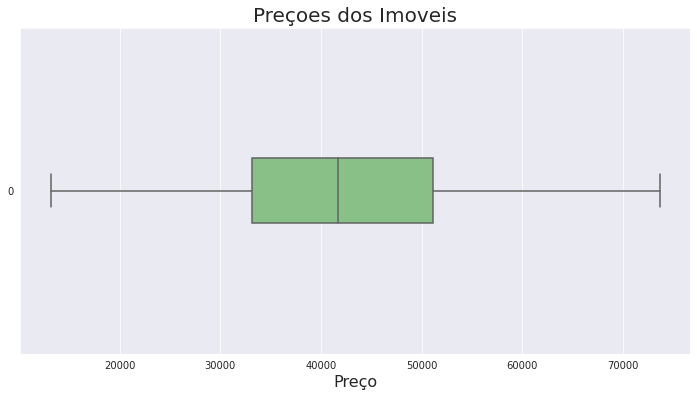

In [7]:
# Box plot da variável dependente (y)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.boxplot(data=dados['precos'], orient='h', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preçoes dos Imoveis', fontsize=20)
ax.set_xlabel('Preço', fontsize = 16)
ax

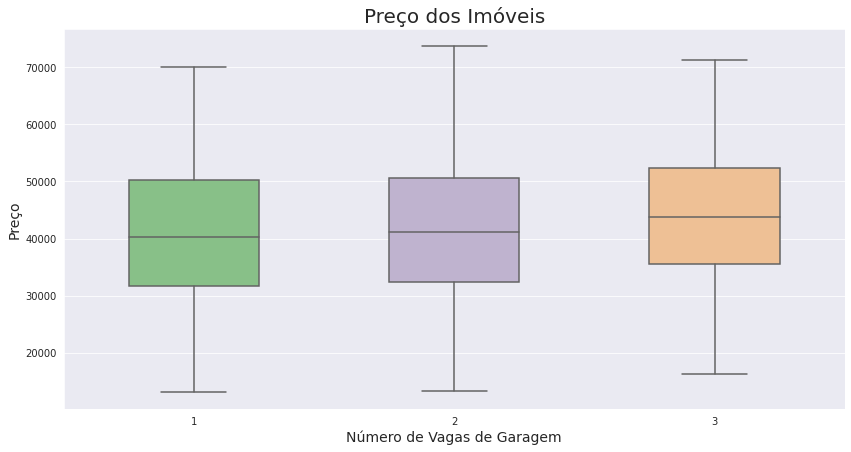

In [8]:
# Box-plot (Preço X Garagem)
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(14, 7)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Preço', fontsize=14)
ax.set_xlabel('Número de Vagas de Garagem', fontsize=14)
ax

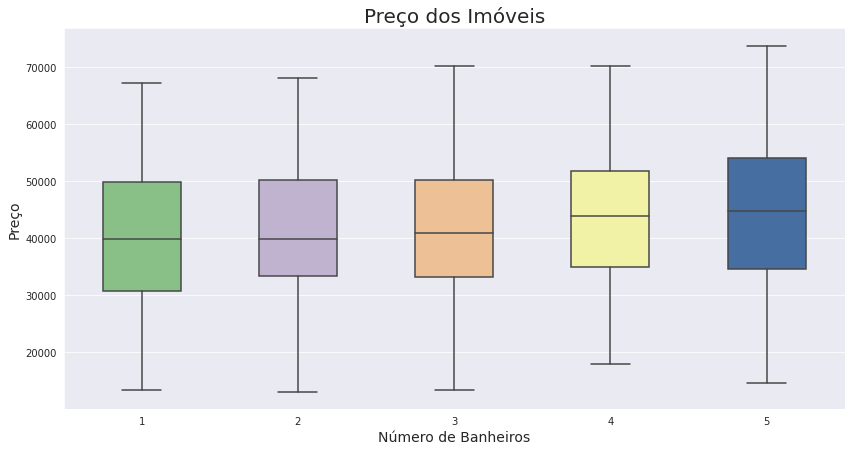

In [9]:
# Box-plot (Preço X Banheiros)
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(14, 7)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Preço', fontsize=14)
ax.set_xlabel('Número de Banheiros', fontsize=14)
ax

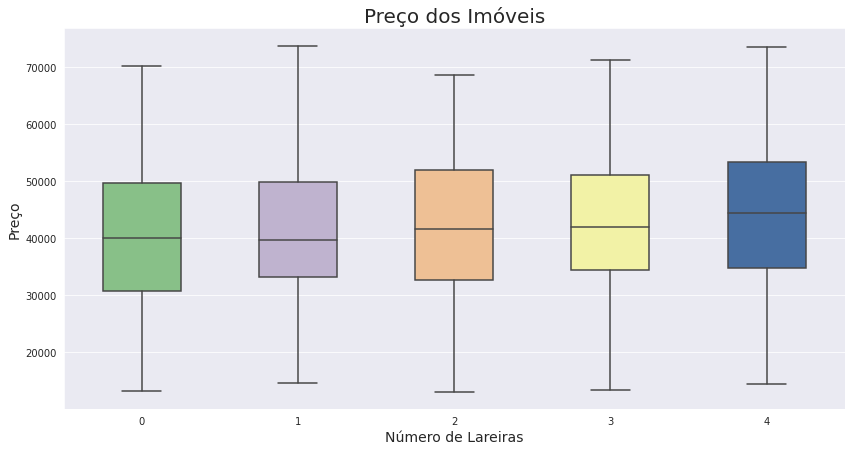

In [10]:
# Box-plot (Preço X Lareira)
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(14, 7)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Preço', fontsize=14)
ax.set_xlabel('Número de Lareiras', fontsize=14)
ax


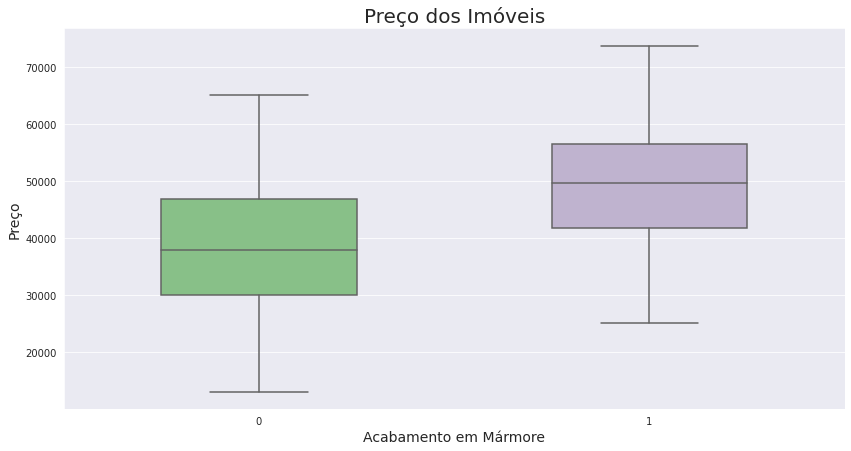

In [11]:
# Box-plot (Preço X Acabamento em Mármore)
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(14, 7)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Preço', fontsize=14)
ax.set_xlabel('Acabamento em Mármore', fontsize=14)
ax

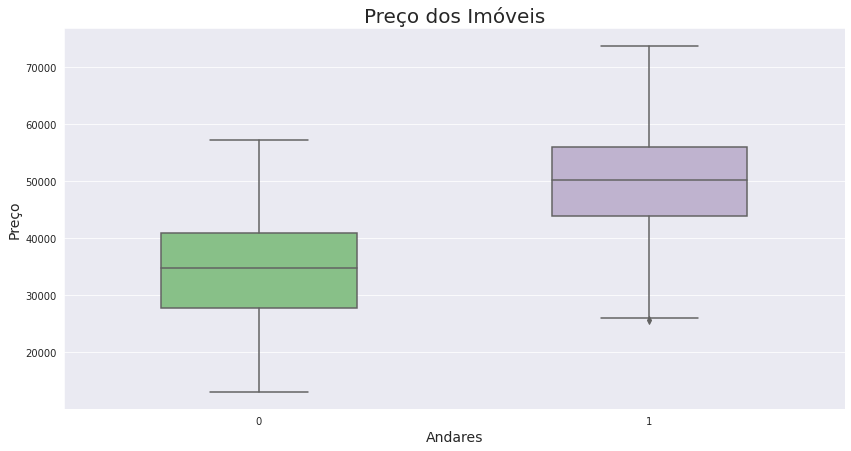

In [12]:
# Box-plot (Preço X Andares)
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(14, 7)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Preço', fontsize=14)
ax.set_xlabel('Andares', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


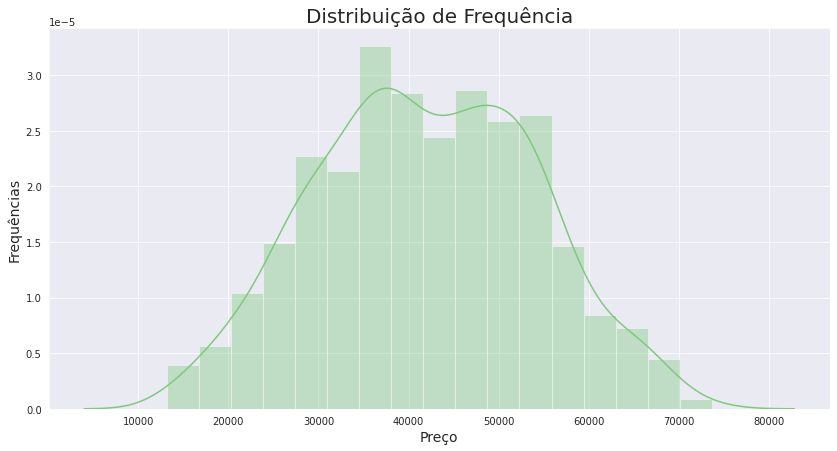

In [13]:
# Distribuição de frequências da variável dependente (y)
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(14, 7)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Frequências', fontsize=14)
ax.set_xlabel('Preço', fontsize=14)
ax

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = dados['precos']
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()

modelo.fit(X_train, y_train)

print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))


R² = 0.66


In [16]:
y_previsto = modelo.predict(X_test)

print('R² = %s' % metrics.r2_score(y_test,y_previsto).round(2))

R² = 0.62


In [17]:
# gerando estimativas de preço a partir de um conjunto de informações de um imóvel.
area=38
garagem=2
banheiros=4
lareira=2
marmore=0
andares=1

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 45107.97


In [18]:
# Métricas da regressão
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Metricas'])

,Metricas
EQM,55782761.70
REQM,7468.79
R²,0.62


In [19]:
# Salvando e Carregando o Modelo Estimado
import pickle
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()